In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('UTY.csv')

In [3]:
df.head()

,Date,10 YR
0,1/30/2017,2.49
1,1/31/2017,2.45
2,2/1/2017,2.48
3,2/2/2017,2.48
4,2/3/2017,2.49


In [4]:
def d2d(xdate):
    parsed = [int(x) for x in xdate.split('/')]
    condate = dt.date(parsed[2], parsed[0], parsed[1])
    return condate

In [5]:
df['Date'] = df['Date'].apply(d2d)

In [6]:
df = df.set_index('Date')

In [7]:
df.plot()

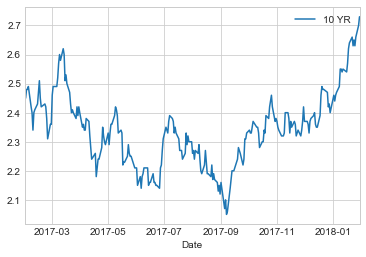

In [8]:
plt.show()

In [9]:
d = df['10 YR']

In [10]:
d = d.reset_index(drop=True)

In [11]:
y = np.array(d)

In [12]:
x = np.array([i for i in range(len(y))])

In [13]:
coefs = poly.polyfit(x, y, 10)

In [14]:
ffit = poly.polyval(x, coefs)

In [15]:
len(ffit)

252

In [16]:
ffit = pd.Series(ffit)

In [23]:
df['fit'][:] = ffit

In [25]:
df.plot(figsize=(10,4))

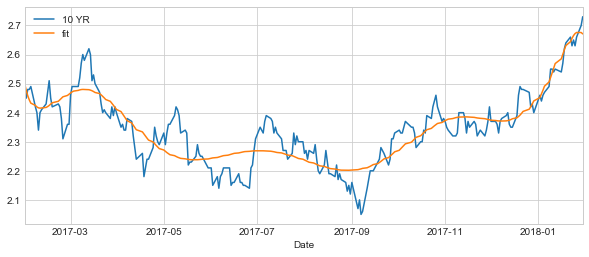

In [26]:
plt.show()